# Sentiment Analysis

**Sentiment analysis** is the process of analyzing digital text to determine if the emotional tone of a given message is positive, negative, or neutral. Today, companies have large volumes of text data like emails, customer support chat transcripts, social media comments, and reviews. So It is widely used across industries to understand public opinion, improve customer service, and inform decision-making processes.<br>
<br>
**Some of the most common use cases are:**
<br>
1)Brand monitoring<br>
2)Market research<br>
3)Improve customer service<br>
4)Competitive research<br>
5)Product Analysis<br> 
   
**How does sentiment analysis work ?** <br>
    
    
**1) Text Preprocessing:**<br>

a) Tokenization - Splitting the text into individual words or tokens.<br>
b) Normalization -  Converting all text to a standard format, such as lowercase and removing punctuation or stopwords.<br>
c) Lemmatization/Stemming - Reducing words to their base or root form.<br> 
    
**2) Feature Extraction:**<br>
a) Bag of Words (BoW) - A representation where text is broken down into individual words or tokens, ignoring grammar and      word order but keeping track of word frequency.<br>
b) TF-IDF (Term Frequency-Inverse Document Frequency): A numerical statistic that reflects the importance of a word in a      document relative to a collection of documents (corpus).<br> 
c) Word Embeddings: Representing words as dense vectors in a continuous vector space, such as using models like Word2Vec,      GloVe, or BERT.<br>
  
**3) classification:**<br>
a) Machine Learning Models: Algorithms like Naive Bayes, Support Vector Machines (SVM), or Logistic Regression can be          trained on labeled data to classify sentiment.<br> 
b) Deep Learning Models: More complex models like Recurrent Neural Networks (RNNs), Long Short-Term Memory Networks (LSTMs)    or Transformers can capture context and dependencies between words, leading to more accurate sentiment predictions.<br> 

**4)Sentiment Scoring:**<br>
After classifying the sentiment, a score or label (e.g., positive, negative, neutral) is assigned to the text.
Some systems also provide a sentiment score, indicating the strength or intensity of the sentiment.   

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import string
import nltk
from nltk.corpus import stopwords
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Loading the Dataset

In [2]:
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
data = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv',encoding=DATASET_ENCODING ,names=DATASET_COLUMNS)

# Data Preprocessing

In [3]:
data.head()  # view of first five rows of the dataset

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
data.shape  # number of rows and columns in the dataset

(1600000, 6)

In [5]:
data.info() # displays various pieces of information regarding the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   ids        1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
data.isnull().sum() # checking for null values

sentiment    0
ids          0
date         0
flag         0
user         0
text         0
dtype: int64

In [7]:
data.duplicated().sum() # checking for duplicated values

0

In [8]:
data=data.drop(['ids', 'date','flag','user'], axis=1)  # Removing all the unnecessary columns

In [9]:
# Taking a smaller chunk of dataset due to limited processing power

df=pd.DataFrame()
df['sentiment']=data['sentiment'][725000:875000]
df['text']=data['text'][725000:875000]

In [10]:
df.head()

,sentiment,text
725000,0,It's official: I'm really sad that I can't go ...
725001,0,@heybrittanyxo they didn't
725002,0,@chainercygnus - its a pain i know but sadly ...
725003,0,Exams soon....so don't want to study
725004,0,PEOPLE JUST DONT LIKE ME...I ONLY GAINED 4 FOL...


In [11]:
df.shape

(150000, 2)

In [12]:
df['sentiment'] = df['sentiment'].replace(4,1) # replacing 4 with 1 as label of positive sentiment tweets

In [13]:
print(pd.unique(df['sentiment']))  
print(Counter(df.sentiment.tolist()))  # balanced dataset with same number of positive and negative tweets

[0 1]
Counter({0: 75000, 1: 75000})


In [14]:
df['text']=df['text'].str.lower() # converting all the text to lowercase

**Data Cleaning**: The dataset contains a lot of URLs, user mentions, punctuation, etc. They do not add any meaning or context to a sentence in determinig its emotional tone, take up a lot of space, slow down processing speed and greatly reduce model performance accuracy by creating bias. So they need to be filtered out.

**So we will remove the following in this dataset**:

1) Emails<br>
2) URLs<br>
3) User mentions<br>
4) Punctuation<br>
5) Special Characters<br>
6) Numbers<br>
7) Consecutive occurence of 3 or more letters in a word<br>

## Removing emails and URLs

In [15]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [16]:
df['text']= df['text'].apply(lambda x: cleaning_email(x))
df['text'] = df['text'].apply(lambda x: cleaning_URLs(x))

## Removing Punctuations

In [17]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
punctuations_list

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [19]:
df['text']= df['text'].apply(lambda x: cleaning_punctuations(x))

## Removing numbers

In [20]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [21]:
df['text'] = df['text'].apply(lambda x: cleaning_numbers(x))

In [22]:
df.head()

,sentiment,text
725000,0,its official im really sad that i cant go to m...
725001,0,they didnt
725002,0,its a pain i know but sadly its the only w...
725003,0,exams soonso dont want to study
725004,0,people just dont like mei only gained followe...


## Replacing consecutive letters (3 or more) with only 2 occurrences in a word

In [23]:
# heyyy --> heyy
# coool --> cool

def remove_consecutive_letters(word):
    return re.sub(r'(.)\1{2,}', r'\1\1', word)

In [24]:
def clean_text(text):
    return ' '.join([remove_consecutive_letters(word) for word in text.split()])

In [25]:
df['text'] = df['text'].apply(clean_text)

In [26]:
df.head()

,sentiment,text
725000,0,its official im really sad that i cant go to m...
725001,0,they didnt
725002,0,its a pain i know but sadly its the only way t...
725003,0,exams soonso dont want to study
725004,0,people just dont like mei only gained follower...


## Data Visualization before stopword removal

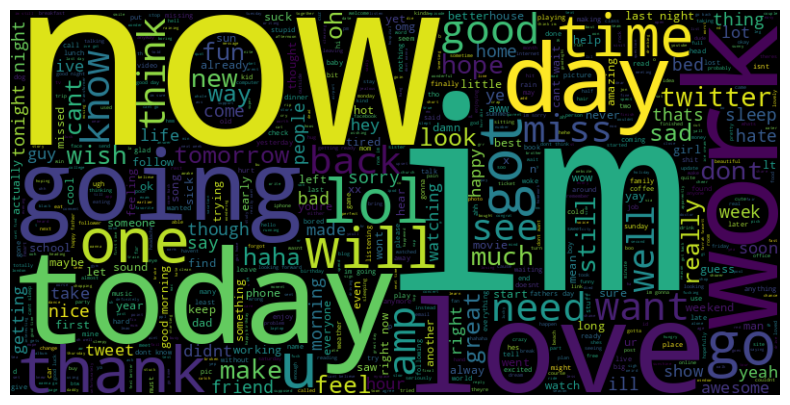

In [27]:
# Data Visualization (using WordCloud) for all the tweets [greater size of word means greater frequency]


# Combine all the text from dataset into a single string
text = ' '.join(df['text']) 

# Generating the word cloud
wordcloud = WordCloud(max_words=2000, width=800, height=400, background_color='black').generate(text)

# Plot the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Identifying and removing stopwords

**Stopwords** are commonly used words in a language that carry little meaning and therefore need to be removed during natural language processing (NLP) tasks. Examples of stopwords in English are words like "is", "the", "in", "on", "and", "for" & "it". These words are used for forming the grammatical structure of sentences but do not any add significant value to the meaning of the text when analyzing content or performing text-based tasks such as search engine optimization, document classification or sentiment analysis.

**What does removing stopwords from text-based dataset do ?**

**1) Improves Computational Efficiency:** By removing stopwords, the amount of data that needs to be processed is reduced. This helps improve the speed of training models and reduces memory usage, as there are fewer words to store and analyze.

**2) Focus on Relevant Information:** Removing stopwords allows algorithms to focus on words that have more meaning or relevance to the task, such as keywords or entities that define the context of a sentence.


Stopwords are pre-defined in many NLP libraries like nltk, SpaCy, etc. but they can also be customized depending on the task or dataset.

**So here I will be using nltk library stopwords as reference and add/remove some stopwords to align with the word count of dataset and the task of sentiment analysis.**

In [28]:
# Creating a new dataframe with the frequency of each word to filter out the stopwords for their removal

def tokenize(text):
    words = text.split()
    return words

# Creating a new column by applying tokenization to the text column
df['cleaned_words'] = df['text'].apply(tokenize)

# Flatten the list of words from all rows
all_words = [word for words in df['cleaned_words'] for word in words]

# Count the frequency of each word
word_freq = Counter(all_words)

# Converting the word frequencies to a DataFrame 
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

# Sorting the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

In [29]:
word_list = word_freq_df['Word'].tolist()
print(len(word_list))   # displays the total number of unique stopwords in the dataset

81288


In [30]:
print(word_list[:200])  # 200 Most frequently occuring words in the dataset

['i', 'to', 'the', 'a', 'my', 'and', 'you', 'is', 'it', 'for', 'in', 'of', 'im', 'on', 'me', 'so', 'have', 'that', 'but', 'just', 'with', 'be', 'at', 'its', 'not', 'was', 'this', 'good', 'now', 'day', 'up', 'out', 'all', 'are', 'get', 'like', 'no', 'go', 'your', 'dont', 'today', 'too', 'do', 'going', 'work', 'cant', 'love', 'am', 'from', 'got', 'time', 'what', 'back', 'about', 'one', 'will', 'know', 'u', 'really', 'lol', 'we', 'can', 'had', 'some', 'see', 'well', 'if', 'still', 'think', 'how', 'new', 'want', 'miss', 'amp', 'night', 'thanks', 'as', 'there', 'when', 'home', 'oh', 'much', 'more', 'here', 'they', 'morning', 'off', 'need', 'twitter', 'an', 'last', 'great', 'hope', 'then', 'has', 'been', 'sad', 'feel', 'thats', 'ill', 'again', 'her', 'sleep', 'tomorrow', 'or', 'he', 'happy', 'bad', 'wish', 'only', 'haha', 'fun', 'right', 'very', 'would', 'why', 'didnt', 'sorry', 'getting', 'nice', 'by', 'come', 'them', 'did', 'were', 'make', 'ive', 'way', 'better', 'gonna', 'though', 'could'

In [31]:
# downloading the nltk library defined stopword list

nltk.download('stopwords')
stop = stopwords.words('english')
print()
print(len(stop))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

179


In [32]:
print(stop) # complete list of nltk stopwords

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [33]:
# final list of stopwords created by analysing actual word counts in our dataset and using nltk library stopwords

final_stopwords=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it',
"it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',  
"that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do',
'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 
'for', 'with', 'about', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 
'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there','when', 'where', 
'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 
'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've',
'y', 'ain','aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 
'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",'i', 'to', 'the', 'a', 
'my', 'and', 'you', 'is', 'it', 'in', 'for', 'of', 'im', 'on', 'me', 'so', 'have', 'that', 'but', 'just', 'with', 'be',
'at', 'its','was', 'this','now', 'up', 'out', 'are', 'all', 'get', 'day','go', 'dont','today','going', 'do','from',
'got', 'time', 'what', 'about', 'one', 'back', 'know', 'will', 'really','u', 'we', 'had', 'can', 'some', 'if', 'see', 'still',
'amp', 'as', 'when','2', 'there','twitter','want','work','think','tomorrow','lol','need','think']

final_stopwords=list(set(final_stopwords))
print(len(final_stopwords))

199


In [34]:
# Removing the stopwords from actual data

df['tweet']=df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (final_stopwords)]))

In [35]:
# Removing extra columns of data that were added during pre-processing

df=df.drop(['text','cleaned_words'], axis=1)

## Data Visualization after stopword removal

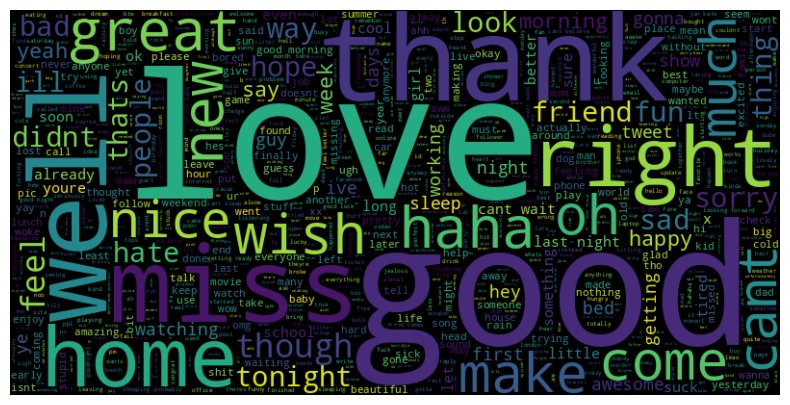

In [36]:
# Data Visualization (using WordCloud) for all the tweets [greater size of word means greater frequency]

text = ' '.join(df['tweet']) 

wordcloud = WordCloud(max_words=2000, width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [37]:
# Separating the positive and negative tweets

df_neg=df[:50000]
df_pos=df[50000:]

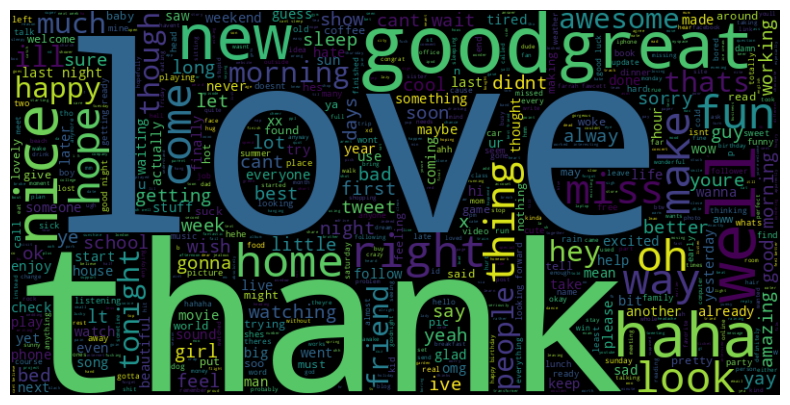

In [38]:
# Data Visualization for all positive tweets

text = ' '.join(df_pos['tweet']) 

wordcloud = WordCloud(max_words=2000, width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


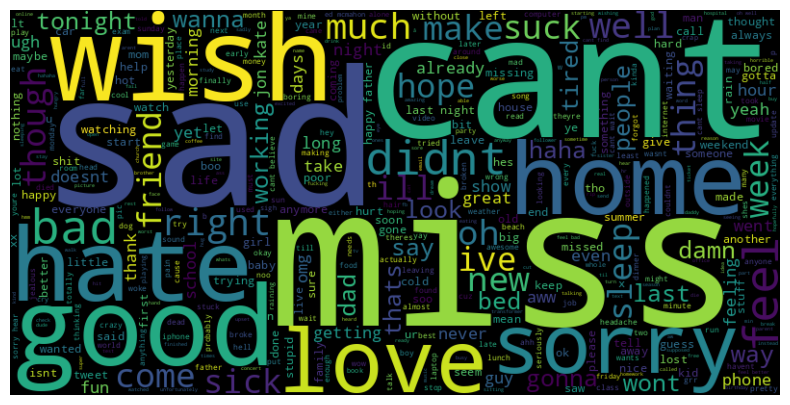

In [39]:
# Data Visualization for all negative tweets

text = ' '.join(df_neg['tweet']) 

wordcloud = WordCloud(max_words=2000, width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Tokenization and Stemming

**Tokenization** is the process of splitting a piece of text like a sentence or paragraph into smaller units called tokens. Tokens can be individual words, phrases, or even characters depending on the type of tokenization being used.

Example: "I am feeling goofy" --> ("I", "am", "feeling", "goofy")

**Why Tokenization ?**

1) Before performing any NLP task raw text must be converted into a structured format that a computer can understand.  Tokenization helps in breaking down the text into smaller and manageable chunks.

2) Most machine learning models expect a numerical or vectorized form of data. Tokenization is the first step to convert text into words or subwords, which can then be further processed into numerical representations like word embeddings.
<br>
<br>
<br>
**Stemming** is the process of reducing a word to its root form or base stem. The goal of stemming is to treat different variations of a word as the same word.

Example: Words like "running," "runs," and "ran" are all reduced to "run."

**Why Stemming ?**

1) It reduces inflected or derived words to their root form, which helps to reduce the vocabulary size and avoid treating different forms of the same word as separate entities.

2) It also helps group similar words together, which improves the model's ability to generalize and capture the essence of the text.


In [40]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
ps = PorterStemmer()

In [42]:
def tokenize_and_stem(tweet):
    words = word_tokenize(tweet)
    stemmed_words = [ps.stem(word) for word in words]
    return ' '.join(stemmed_words)

In [43]:
tqdm.pandas()  # Enable progress bar with tqdm
df['text'] = df['tweet'].progress_apply(tokenize_and_stem)

100%|██████████| 150000/150000 [00:53<00:00, 2814.29it/s]


In [44]:
print(df['tweet'][794311])
print(df['text'][794311])

denied babysitters row guess spontaneous date nights tough book sitter week advance
deni babysitt row guess spontan date night tough book sitter week advanc


## Bag Of Words technique to convert text to vectors

A **Count Vectorizer** is used to convert a collection of text-based data into a matrix of token counts. It is a bag-of-words model, where each text sentence is represented by a vector, and each element in the vector corresponds to the count of a specific word (token) in that document.

**Steps:**

1) The first step is creating a vocabulary of all unique words in the corpus.<br>
2) For each sentence, a vector is created where each dimension corresponds to the count of a specific word in the vocabulary. 

--> If the word appears in the document, its count is increased by 1; if it doesn’t, the value is zero.

**Example:**

1) I am working.<br>
2) Keep working hard.<br>
3) Working is fun.<br>

Vocabulary: ('I', 'am', 'working', 'keep', 'hard', 'is', 'fun')

Vector Representation for each sentence:

1) [1,1,1,0,0,0,0]<br>
2) [0,0,1,1,1,0,0]<br>
3) [0,0,1,0,0,1,1]<br>

In [45]:
cv=CountVectorizer(max_features=7000) # considering first 7000 most frequent words in dataset for vector representation

In [46]:
# Separating feature and labels
X=df['text']
y=df['sentiment']

In [47]:
vectors=cv.fit_transform(X).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Train test split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(vectors, y, test_size=0.2)

# Logistic Regression

**Logistic Regression** is a statistical machine learning model used for binary classification problems.<br>
--> It is mainly used for problems where the output can take two possible values, often labeled as 0 and 1 (such as yes/no, true/false, spam/not spam).<br>
--> The output is a probability between 0 and 1, which is then thresholded to classify the instance as either class 0 or class 1 (usually with 0.5 as the threshold).<br>

--> The core of logistic regression is the sigmoid function, which is used to convert linear outputs into probabilities.<br>
--> It uses binary cross-entropy (or log loss) as the cost function. It measures the performance of the model by penalizing incorrect predictions.<br>
--> The weights in logistic regression are learned using gradient descent, an optimization algorithm that iteratively updates the weights to minimize the cost function.


In [49]:
logr = linear_model.LogisticRegression(max_iter=500) # model initialization

In [50]:
logr.fit(X_train,y_train) # model training

LogisticRegression(max_iter=500)

In [51]:
y_pred_logr = logr.predict(X_test) # prediction on test dataset

In [52]:
# model prediction accuracy
logr_score = accuracy_score(y_test,y_pred_logr)
print(logr_score)

0.779


In [53]:
print(classification_report(y_test, y_pred_logr)) 

              precision    recall  f1-score   support

           0       0.79      0.75      0.77     14970
           1       0.77      0.80      0.78     15030

    accuracy                           0.78     30000
   macro avg       0.78      0.78      0.78     30000
weighted avg       0.78      0.78      0.78     30000



# Naive Bayes

**Naive Bayes** is a probabilistic classification algorithm based on applying Bayes theorem with the assumption of independence between features.<br>
--> It is called "naive" because it assumes that all features are independent of each other, which is often not the case in real-world data.<br>
--> The foundation of Naive Bayes is Bayes theorem, which describes the probability of a hypothesis given evidence.<br>

**Multinomial Naive Bayes**:<br>
--> Used for discrete data, especially for text classification problems (e.g., spam filtering, sentiment analysis).<br>
--> The features represent the frequency (or count) of words, and the likelihood is based on the multinomial distribution.<br>
--> Common for bag-of-words or TF-IDF representations of text data.


In [54]:
nb_clf = MultinomialNB()  # model initialization
nb_clf.fit(X_train, y_train)  # model training

MultinomialNB()

In [55]:
y_pred_nb_clf = nb_clf.predict(X_test)  # prediction on test dataset

In [56]:
# model prediction accuracy
nb_clf_score = accuracy_score(y_test, y_pred_nb_clf)
print(nb_clf_score)

0.7714333333333333


In [57]:
print(classification_report(y_test, y_pred_nb_clf))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77     14970
           1       0.78      0.76      0.77     15030

    accuracy                           0.77     30000
   macro avg       0.77      0.77      0.77     30000
weighted avg       0.77      0.77      0.77     30000



# Support Vector Machine

**Support Vector Machine** is a machine learning algorithm used for classification tasks that works by finding the optimal decision boundary, called a hyperplane, that separates the data points of different classes with the maximum margin.<br>
--> The hyperplane tries that the margin between the closest points of different classes should be as maximum as possible.<br>
--> The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three, then the hyperplane becomes a 2-D plane.<br> 

--> Support vectors are the data points that lie closest to the decision boundary (hyperplane). These points are crucial in determining the position and orientation of the hyperplane.<br>
--> The algorithm only uses the support vectors to determine the hyperplane, which makes SVM robust to outliers since it doesn't rely on all the data points.<br>

In [58]:
svc = LinearSVC(max_iter=5000)  # model initialization
svc.fit(X_train, y_train)  # model training

LinearSVC(max_iter=5000)

In [59]:
y_pred_svc = svc.predict(X_test)  # prediction on test dataset

In [60]:
# model prediction accuracy
svc_score = accuracy_score(y_test, y_pred_svc)
print(svc_score)

0.7735


In [61]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77     14970
           1       0.76      0.80      0.78     15030

    accuracy                           0.77     30000
   macro avg       0.77      0.77      0.77     30000
weighted avg       0.77      0.77      0.77     30000



# Stochastic Gradient Descent

**Stochastic Gradient Descent** is an optimization algorithm used to minimize the loss function in machine learning models, particularly in large-scale and complex models like neural networks.<br>
--> It is a variant of the Gradient Descent algorithm, which seeks to find the model parameters/weights that minimize a given cost function.<br>
--> In SGD, instead of calculating the gradient over the entire dataset, it computes the gradient using only a single randomly chosen data point (or a small batch) at each iteration. This makes it much faster and more scalable for large datasets.


In [62]:
sgd = SGDClassifier()  # model initialization
sgd.fit(X_train, y_train)  # model training

SGDClassifier()

In [63]:
y_pred_sgd = sgd.predict(X_test) # prediction on test dataset

In [64]:
# model prediction accuracy
sgd_score = accuracy_score(y_test, y_pred_sgd)
print(sgd_score)

0.7795333333333333


In [65]:
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77     14970
           1       0.76      0.83      0.79     15030

    accuracy                           0.78     30000
   macro avg       0.78      0.78      0.78     30000
weighted avg       0.78      0.78      0.78     30000



# RNN Model - Long Short Term Memory (LSTM)

**LSTMs** are a powerful variant of RNNs that can handle long-term dependencies by using memory cells and gates. They are used extensively in tasks that require learning from sequential data and have become a fundamental model in fields like natural language processing.<br>

**Key points:**<br>
1) LSTMs are specialized for handling sequential data, where the order of the data points is important.<br>

2) The important feature of an LSTM is the memory cell, which is responsible for maintaining information over time. The memory cell helps LSTMs remember long-term dependencies while also allowing the model to forget irrelevant information.<br>

3) LSTMs have three gates that control the flow of information: forget gate, input gate and output gate.<br>

4) Forget Gate: This gate decides which information to discard from the cell state. <br>

5) Input Gate: This gate determines which new information to store in the cell state.<br>

6) Cell State Update: The current cell state is updated by combining the forget gate's output and the new candidate cell state. The forget gate controls how much of the previous cell state to keep, and the input gate controls how much new information to add.<br>

7) Output Gate: The output gate decides what the next hidden state should be.


In [66]:
train_X, test_X, train_y, test_y = train_test_split(df['tweet'], y, test_size=0.2) # train test split

In [67]:
# tokenization of data
# the tokenizer object is fitted on data where it learns the vocabulary by mapping each unique word to a corresponding integer index.

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_X)

word_index = tokenizer.word_index # a dictionary that maps words to their corresponding integer indices, created by the tokenizer after fitting.
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 70280


In [68]:
# converting the text data into sequences of integer indices based on the word index learned during tokenization. 
# Each word in the text is replaced by its corresponding integer from the tokenizer's vocabulary.

# After converting the text into sequences, the pad_sequences function is used to ensure that all sequences have the same length (MAX_SEQUENCE_LENGTH = 50). 
# Sequences shorter than 50 words are padded with zeros at the beginning (by default), while longer sequences are truncated.

MAX_SEQUENCE_LENGTH = 50 
x_train = pad_sequences(tokenizer.texts_to_sequences(train_X),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_X),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (120000, 50)
Testing X Shape: (30000, 50)


In [69]:
 # downloading and unzipping the GloVe (Global Vectors for Word Representation) pre-trained word embeddings from the Stanford NLP website.

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


--2024-09-08 03:01:25--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-09-08 03:01:25--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-09-08 03:01:25--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: 'glove.6B.zip'

glov

In [70]:
# Parameters
GLOVE_EMB = '/kaggle/working/glove.6B.300d.txt' # 300-dimensional version of GloVe, which represents each word as a 300-dimensional vector.
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 70
MODEL_PATH = '.../output/kaggle/working/best_model.hdf5'

In [71]:
# reading the GloVe embeddings file and populating a dictionary with word vectors.

embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Total %s word vectors.' %len(embeddings_index))

Total 400000 word vectors.


In [72]:
# we have initialized a matrix where each row will represent a single word and all the corresponding columns for a row will be the vector representation of the given word
# creating an embedding matrix where each row corresponds to the GloVe vector of a word in the vocabulary.

embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [73]:
# creating a Keras embedding layer initialized with the GloVe embeddings, which will be used in the model. 
# The embeddings are fixed and not updated during training.

embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [74]:
# LSTM model architecture

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')  # input layer - for recieving sequences of integers 
embedding_sequences = embedding_layer(sequence_input) # embedding layer - to convert integers to dense vectors using GloVe embeddings
x = SpatialDropout1D(0.2)(embedding_sequences) # dropout layer to prevent overfitting
x = Conv1D(64, 5, activation='relu')(x) # Conv1D layer - to extract features from sequences
x = Bidirectional(LSTM(64, dropout=0.5, recurrent_dropout=0.2))(x) # LSTM: to capture context from both directions of the sequence.
x = Dense(512, activation='relu')(x) # dense layer - to learn and process features through fully connected layers
x = Dropout(0.5)(x) # dropout layer to prevent overfitting
x = Dense(512, activation='relu')(x) # dense layer - to learn and process features through fully connected layers
outputs = Dense(1, activation='sigmoid')(x) # output layer
model = tf.keras.Model(sequence_input, outputs)

In [75]:
model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',metrics=['accuracy']) # model compilation

# callback to adjust the learning rate dynamically when validation loss stops improving
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1, min_lr = 0.01, monitor = 'val_loss', verbose = 1)

In [76]:
print("GPU") if tf.test.is_gpu_available() else print("CPU")

GPU


In [77]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 50, 300)        │    21,084,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 50, 300)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 46, 64)         │        96,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,575,329 (82.30 MB)

 Trainable params: 491,329 (1.87 MB)

 Non-trainable params: 21,084,000 (80.43 MB)

In [78]:
# actual model training

history = model.fit(x_train, train_y, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, test_y), callbacks=[ReduceLROnPlateau])

Epoch 1/70
118/118 ━━━━━━━━━━━━━━━━━━━━ 22s 119ms/step - accuracy: 0.6299 - loss: 0.6300 - val_accuracy: 0.7356 - val_loss: 0.5233 - learning_rate: 0.0010
Epoch 2/70
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - accuracy: 0.7268 - loss: 0.5411 - val_accuracy: 0.7439 - val_loss: 0.5097 - learning_rate: 0.0010
Epoch 3/70
118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 115ms/step - accuracy: 0.7394 - loss: 0.5212 - val_accuracy: 0.7600 - val_loss: 0.4941 - learning_rate: 0.0010
Epoch 4/70
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.7526 - loss: 0.5036 - val_accuracy: 0.7615 - val_loss: 0.4884 - learning_rate: 0.0010
Epoch 5/70
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.7606 - loss: 0.4928 - val_accuracy: 0.7665 - val_loss: 0.4813 - learning_rate: 0.0010
Epoch 6/70
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 112ms/step - accuracy: 0.7658 - loss: 0.4814 - val_accuracy: 0.7670 - val_loss: 0.4778 - learning_rate: 0.0010
Epoch 7/70
118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step - accuracy: 0.7

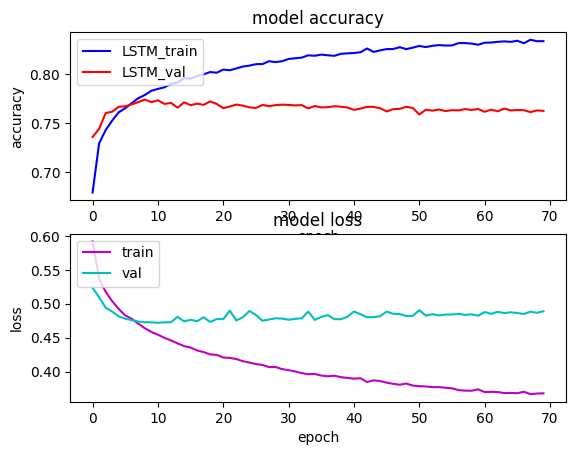

In [79]:
# visualization/plotting of results obtained during LSTM model training using matplotlib

s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

print("\n\n\n")

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')